In [2]:
import numpy as np
import matplotlib.pyplot as plt

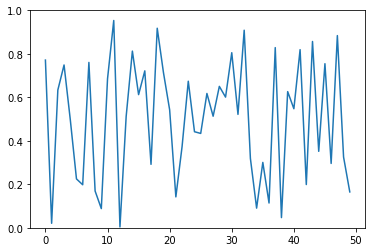

In [149]:
np.random.seed(10)
data = np.random.rand(50)

plt.plot(data)
plt.ylim(0,1)
plt.show()

We want to apply small changes with more weight than large changes

Were $y$ is the output, $x$ is the predictions from the model and $d$ is a constant $>= 1$ that controls the amount to dampen the signal.

The smoothed/dampended signal is equal to:

$$y^{n} = y^{n-1} + (x^{n}-y^{n-1})\cdot \frac{1-\left | x^{n} - y^{n-1}  \right |}{d}$$

If the difference (residual) between the last output ($y^{n-1}$) and the current prediction ($x^{n}$) is represented as $r$:

$$ r = x^{n}-y^{n-1} $$

The the equation is easier to look at:

$$y^{n} = y^{n-1} + r\cdot \frac{1-\left | r  \right |}{d}$$


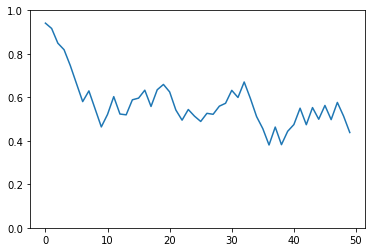

In [150]:
smoothed = []
prev = 1
dampener_factor = 3

for val in data:
    residual =  (val - prev)
    weight = (1-abs(residual))/dampener_factor
    addition = weight * residual
    next_val = prev + addition
    smoothed.append(next_val)
    prev = next_val
    
plt.plot(smoothed)
plt.ylim(0,1)
plt.show()